In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re , nltk , string , gensim , spacy, pyLDAvis , syllables , pyLDAvis.gensim
import gensim.corpora as corpora

from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel , TfidfModel 
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import cmudict, stopwords
from textblob import TextBlob

nltk.download('punkt')
nltk.download('stopwords')

data = pd.read_csv("master_dataset/merged_cleaned.csv")
data.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,text,class,text_without_stopwords,title_without_stopwords
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1,Donald Trump wish Americans Happy New Year lea...,Donald Trump Sends Out Embarrassing New Year’s...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,House Intelligence Committee Chairman Devin Nu...,Drunk Bragging Trump Staffer Started Russian C...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,"On Friday, revealed former Milwaukee Sheriff D...",Sheriff David Clarke Becomes An Internet Joke ...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1,"On Christmas day, Donald Trump announced would...",Trump Is So Obsessed He Even Has Obama’s Name ...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,Pope Francis used annual Christmas Day message...,Pope Francis Just Called Out Donald Trump Duri...


In [2]:
#text-based features
#word count


def word_count(text):
    text = str(text).lower()
    text = text.replace("\r\n", ' ')
    if text == "no title":
        return 0
    else:
        return len(str(text).split(' '))

def sentence_count(text):
    sentences = nltk.sent_tokenize(text)
    return len(sentences)

def average_word_length(text):
    words = text.split()
    count = 0
    for word in words:
        count += len(word)
    if len(words) == 0:
        return 0
    else:
        return count / len(words)
        
def punctuation_count(text):
    count = 0
    for word in text:
        if word in string.punctuation:
            count += 1
    return count

def stopword_count(text):
    stopword = stopwords.words('english')
    count = 0
    for word in text.split():
        if word in stopword:
            count += 1
    return count

#change data type to string
data['text'] = data['text'].astype(str)
data['title'] = data['title'].astype(str)

data['text_word_count'] = data['text'].apply(word_count)
data['title_word_count'] = data['title'].apply(word_count)

data['text_sentence_count'] = data['text'].apply(sentence_count)
data['title_sentence_count'] = data['title'].apply(sentence_count)

data['text_average_word_length'] = data['text'].apply(average_word_length)
data['title_average_word_length'] = data['title'].apply(average_word_length)

data['text_punctuation_count'] = data['text'].apply(punctuation_count)
data['title_punctuation_count'] = data['title'].apply(punctuation_count)

data['text_stopwords_count'] = data['text'].apply(stopword_count)
data['title_stopwords_count'] = data['title'].apply(stopword_count)

In [3]:
data

,title,text,class,text_without_stopwords,title_without_stopwords,text_word_count,title_word_count,text_sentence_count,title_sentence_count,text_average_word_length,title_average_word_length,text_punctuation_count,title_punctuation_count,text_stopwords_count,title_stopwords_count
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1,Donald Trump wish Americans Happy New Year lea...,Donald Trump Sends Out Embarrassing New Year’s...,516,13,28,1,4.804040,5.583333,121,1,186,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,House Intelligence Committee Chairman Devin Nu...,Drunk Bragging Trump Staffer Started Russian C...,309,9,11,1,5.213115,7.625000,39,0,119,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,"On Friday, revealed former Milwaukee Sheriff D...",Sheriff David Clarke Becomes An Internet Joke ...,600,16,25,1,5.168966,5.000000,148,0,209,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1,"On Christmas day, Donald Trump announced would...",Trump Is So Obsessed He Even Has Obama’s Name ...,475,15,15,1,5.180180,4.571429,118,2,160,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,Pope Francis used annual Christmas Day message...,Pope Francis Just Called Out Donald Trump Duri...,434,12,19,1,4.554762,5.363636,40,0,195,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39100,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,0,NATO allies Tuesday welcomed President Donald ...,'Fully committed' NATO backs new U.S. approach...,482,9,15,1,5.008639,5.888889,68,4,179,1
39101,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",0,"LexisNexis, provider legal, regulatory busines...",LexisNexis withdrew two products Chinese market,131,7,6,1,5.336066,6.571429,15,0,45,1
39102,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,0,"In shadow disused Soviet-era factories Minsk, ...",Minsk cultural hub becomes authorities,334,7,16,1,5.044164,6.142857,45,0,127,2
39103,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,0,Vatican Secretary State Cardinal Pietro Paroli...,Vatican upbeat possibility Pope Francis visiti...,210,9,8,1,4.806931,5.888889,18,0,81,2


### Flesch Sensitivity

In [4]:
#Calculating number of syllables in a word
def nsyl(word):
    return syllables.estimate(word) 

#Calculating number of syllables in a text 
def syllables_text(text):
    syllable_count = sum(list(map(lambda w: nsyl(w), word_tokenize(text))))
    return syllable_count

data['syllables'] = data['text'].apply(syllables_text)

In [5]:
# Flesch-Kincaid Readability Metric
def flesch_formula(word_count, sent_count, syllable_count):
    if sent_count == 0:
        return 0
    else:
        return 206.835 - 1.015*word_count/sent_count - 84.6*syllable_count/word_count
    
# Get flesch readability
data['flesch_readability'] = data.apply(lambda n: flesch_formula(n['text_word_count'],n['text_sentence_count'],n['syllables']),axis=1)
data['flesch_readability'] = (data['flesch_readability'] - data['flesch_readability'].mean()) / data['flesch_readability'].std()

In [6]:
# Calculate subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
  
# Calculate polarity 
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
  
#Get subjectivity and polarity
data['subjectivity'] = data['text'].apply(getSubjectivity)
data['polarity'] = data['text'].apply(getPolarity)

### Topic Modelling

In [7]:
print(data['text_without_stopwords'].isna().sum())

print(data['title_without_stopwords'].isna().sum())

# Apparently there is 447 rows that have missing value, we will exclude it

447
0


In [8]:
data = data[data['text_without_stopwords'].notna()]

In [9]:
data['text_without_stopwords'] = data['text_without_stopwords'].map(lambda x: re.sub('[,\.!?]', '', x))
data['title_without_stopwords'] = data['title_without_stopwords'].map(lambda x: re.sub('[,\.!?]', '', x))
data['text_without_stopwords'] = data['text_without_stopwords'].map(lambda x: x.lower())
data['title_without_stopwords'] = data['title_without_stopwords'].map(lambda x: x.lower())
data['overall_content'] = data['title_without_stopwords'] + ' ' + data['text_without_stopwords']

<>:1: DeprecationWarning: invalid escape sequence \.
<>:2: DeprecationWarning: invalid escape sequence \.
<>:1: DeprecationWarning: invalid escape sequence \.
<>:2: DeprecationWarning: invalid escape sequence \.
C:\Users\Admin\AppData\Local\Temp/ipykernel_18712/3176515627.py:1: DeprecationWarning: invalid escape sequence \.
  data['text_without_stopwords'] = data['text_without_stopwords'].map(lambda x: re.sub('[,\.!?]', '', x))
C:\Users\Admin\AppData\Local\Temp/ipykernel_18712/3176515627.py:2: DeprecationWarning: invalid escape sequence \.
  data['title_without_stopwords'] = data['title_without_stopwords'].map(lambda x: re.sub('[,\.!?]', '', x))
C:\Users\Admin\AppData\Local\Temp/ipykernel_18712/3176515627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

#### Next, we create a Python function to lemmatize the content in our news.

In [10]:
def lemmatize(text, allowed_postags = ["NOUN", "ADJ", "VERB", "ADV"]):
#we only consider the nouns, adjective, verbs and adverbs as these are the POS tags which give our text most contextual meaning 
    nlp = spacy.load("en_core_web_sm", exclude = ["parser", "ner"])
    output = []
    for content in text:
        contents = nlp(content)
        temp = []
        for word in contents:
            if word.pos_ in allowed_postags: 
                temp.append(word.lemma_)
        lemmatized_content = " ".join(temp)
        output.append(lemmatized_content)
    return output 

texts = list(data['overall_content'])
output = lemmatize(texts)

Next, we implement a preprocessing function to tokenize our text. 
We will do this by implementing an iterative function which uses the simple_preprocess function from the gensim library.

In [11]:
def preprocess(text):
    result = []
    for article in text:
        temporary = gensim.utils.simple_preprocess(article)
        result.append(temporary)
    return result
all_words = preprocess(output)

To improve the results of our topic modelling later on, we also identify bigrams and trigrams in our text, which are phrases of two words and three words respectively which appear commonly in our text. 

In [12]:
bigram_phrases = gensim.models.Phrases(all_words, min_count = 5, threshold = 50) #min_count and threshold are hyperparameters we can tune later
trigram_phases = gensim.models.Phrases(bigram_phrases[all_words], min_count = 5, threshold = 50)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(bigram_phrases)

In [13]:
new_corpus_bigrams = []
for text in all_words:
    new_corpus_bigrams.append(bigram[text])
    
new_corpus_trigrams = []
for text in all_words:
    new_corpus_trigrams.append(trigram[bigram[text]])
    
for i in range(len(new_corpus_bigrams)):
    if set(new_corpus_bigrams[i]) != set(new_corpus_trigrams[i]):
        print(i)

980


Currently it appears that among all our texts, only one article contains trigrams. However, since all trigrams are also considered bigrams, we will use the trigrams to generate our corpus for the topic modelling classification.

Following this, we generate the corpus that we will use for our topic modelling. 

In [14]:
id2word = corpora.Dictionary(new_corpus_trigrams)

corpus = []
for text in new_corpus_trigrams:
    frequencies = id2word.doc2bow(text) #counts occurence of each word in every document
    corpus.append(frequencies) #stores into corpus, which becomes a list of lists

In addition, we also filter out low value words in our corpus which do not add much meaning into the text using the TF-IDF statistical measure.

In [15]:
tfidf = TfidfModel(corpus, id2word = id2word)

low_value = 0.05 #set a TF-IDF score of 0.05 as a threshold 
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing
    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]         
    corpus[i] = new_bow

In [16]:
%store corpus 
%store id2word

Stored 'corpus' (list)
Stored 'id2word' (Dictionary)


We are almost ready to generate our LDA model. However, we first need to determine the number of topics to train our model on. In order to determine this, we will use the coherence score metric to do. Therefore, we first implement a Python function that will allow us to determine a coherence score for a given LDA model. 

In [17]:
def calculate_coherence_score(n):
    lda = gensim.models.ldamodel.LdaModel(corpus= corpus,
                                          id2word = id2word,
                                          num_topics = n,
                                          random_state = 4222, 
                                          update_every = 1,
                                          chunksize = 2000,
                                          passes = 10,
                                          alpha = "auto")
    coherence_model_lda = CoherenceModel(model = lda, corpus = corpus, dictionary = id2word, coherence = 'u_mass')
    coherence_score = coherence_model_lda.get_coherence()
    return coherence_score

A list of possible number of topics is given below under topics_list. In addition, we will also store the coherence scores in a list for data visualisation purposes later. 

In [18]:
topics_list = [3,4,5,6,7,8,9,10] 
scores = [] 

for n in topics_list:
    coherence_score = calculate_coherence_score(n)
    scores.append(coherence_score)
    print(f"n : {n} ; Coherence Score : {coherence_score}")

n : 3 ; Coherence Score : -2.879146225664192
n : 4 ; Coherence Score : -2.697419543588177
n : 5 ; Coherence Score : -2.7005849422195594
n : 6 ; Coherence Score : -2.6872509116932886
n : 7 ; Coherence Score : -2.777047028246314
n : 8 ; Coherence Score : -3.0230808996086775
n : 9 ; Coherence Score : -3.1514058195967993
n : 10 ; Coherence Score : -3.1308408673231773


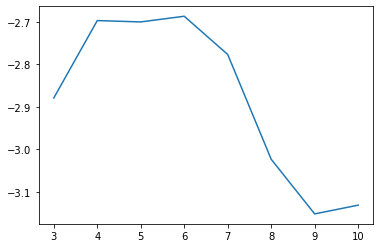

In [19]:
x = np.array(topics_list)
y = np.array(scores)

plt.plot(x,y)
plt.xticks(x)
plt.show()

From the plot above, the coherence score is the highest when there are 6 topics. However apart from coherence score, we have decided to take in other factors into account such as having a sufficiently large number of topics and maximising the possibility of avoiding overfitting. Therefore, our final choice is to train our LDA model by setting n_topics = 5, which is a good balance of our three factors of consideration. 

In [20]:
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus, 
                                            num_topics = 5,
                                            id2word = id2word,
                                            chunksize = 2000,
                                            passes = 10,
                                            update_every = 1,
                                            alpha = 'auto',
                                            random_state = 4222)

%store lda_model

Stored 'lda_model' (LdaModel)


In [21]:
outputs = []
for i in range(len(corpus)):
    topic_distribution = lda_model.get_document_topics(corpus[i], minimum_probability = 0.0)
    outputs.append(topic_distribution)
    
import numpy as np
outputs = np.array(outputs).T.tolist()
outputs = outputs[1:]

data['Topic 1 Probability'] = outputs[0][0]
data['Topic 2 Probability'] = outputs[0][1]
data['Topic 3 Probability'] = outputs[0][2]
data['Topic 4 Probability'] = outputs[0][3]
data['Topic 5 Probability'] = outputs[0][4]

C:\Users\Admin\AppData\Local\Temp/ipykernel_18712/2553287319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Topic 1 Probability'] = outputs[0][0]
C:\Users\Admin\AppData\Local\Temp/ipykernel_18712/2553287319.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Topic 2 Probability'] = outputs[0][1]
C:\Users\Admin\AppData\Local\Temp/ipykernel_18712/2553287319.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

### Sentiment Analysis

In [22]:
# Categorise polarity and do one-hot encoding 
data['polarity_category'] = pd.cut(x=data['polarity'], bins=[-1,-0.05,0.05,1], labels=['Negative', 'Neutral', 'Positive'])
dummy = pd.get_dummies(data['polarity_category'], prefix='polarity_category', drop_first=True)
data = pd.concat([data,dummy], axis=1)

C:\Users\Admin\AppData\Local\Temp/ipykernel_18712/107476384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['polarity_category'] = pd.cut(x=data['polarity'], bins=[-1,-0.05,0.05,1], labels=['Negative', 'Neutral', 'Positive'])


In [23]:
data

,title,text,class,text_without_stopwords,title_without_stopwords,text_word_count,title_word_count,text_sentence_count,title_sentence_count,text_average_word_length,...,polarity,overall_content,Topic 1 Probability,Topic 2 Probability,Topic 3 Probbility,Topic 4 Probability,Topic 5 Probability,polarity_category,polarity_category_Neutral,polarity_category_Positive
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1,donald trump wish americans happy new year lea...,donald trump sends out embarrassing new year’s...,516,13,28,1,4.804040,...,0.082132,donald trump sends out embarrassing new year’s...,0.002194,0.747636,0.001007,0.157660,0.091503,Positive,0,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian c...,309,9,11,1,5.213115,...,-0.005004,drunk bragging trump staffer started russian c...,0.064904,0.244962,0.557051,0.002320,0.130763,Neutral,1,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,on friday revealed former milwaukee sheriff da...,sheriff david clarke becomes an internet joke ...,600,16,25,1,5.168966,...,-0.012345,sheriff david clarke becomes an internet joke ...,0.002488,0.433611,0.281460,0.001917,0.280524,Neutral,1,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1,on christmas day donald trump announced would ...,trump is so obsessed he even has obama’s name ...,475,15,15,1,5.180180,...,-0.023118,trump is so obsessed he even has obama’s name ...,0.002963,0.788261,0.204377,0.002290,0.002109,Neutral,1,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,pope francis used annual christmas day message...,pope francis just called out donald trump duri...,434,12,19,1,4.554762,...,-0.011722,pope francis just called out donald trump duri...,0.292172,0.327938,0.001138,0.020911,0.357842,Neutral,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39100,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,0,nato allies tuesday welcomed president donald ...,'fully committed' nato backs new us approach a...,482,9,15,1,5.008639,...,0.219279,'fully committed' nato backs new us approach a...,0.914667,0.001589,0.001079,0.081064,0.001601,Positive,0,1
39101,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",0,lexisnexis provider legal regulatory business ...,lexisnexis withdrew two products chinese market,131,7,6,1,5.336066,...,0.022222,lexisnexis withdrew two products chinese marke...,0.131316,0.004004,0.530149,0.330457,0.004075,Neutral,1,0
39102,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,0,in shadow disused soviet-era factories minsk s...,minsk cultural hub becomes authorities,334,7,16,1,5.044164,...,0.054382,minsk cultural hub becomes authorities in shad...,0.105075,0.002268,0.001528,0.172448,0.718681,Positive,0,1
39103,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,0,vatican secretary state cardinal pietro paroli...,vatican upbeat possibility pope francis visiti...,210,9,8,1,4.806931,...,0.021993,vatican upbeat possibility pope francis visiti...,0.957421,0.003175,0.002141,0.003484,0.033779,Neutral,1,0


In [24]:
# Write the newly cleaned dataframe in new file
data.to_csv("processed_data.csv", index=False) # Dataset with text feature

In [25]:
data

,title,text,class,text_without_stopwords,title_without_stopwords,text_word_count,title_word_count,text_sentence_count,title_sentence_count,text_average_word_length,...,polarity,overall_content,Topic 1 Probability,Topic 2 Probability,Topic 3 Probbility,Topic 4 Probability,Topic 5 Probability,polarity_category,polarity_category_Neutral,polarity_category_Positive
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1,donald trump wish americans happy new year lea...,donald trump sends out embarrassing new year’s...,516,13,28,1,4.804040,...,0.082132,donald trump sends out embarrassing new year’s...,0.002194,0.747636,0.001007,0.157660,0.091503,Positive,0,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian c...,309,9,11,1,5.213115,...,-0.005004,drunk bragging trump staffer started russian c...,0.064904,0.244962,0.557051,0.002320,0.130763,Neutral,1,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,on friday revealed former milwaukee sheriff da...,sheriff david clarke becomes an internet joke ...,600,16,25,1,5.168966,...,-0.012345,sheriff david clarke becomes an internet joke ...,0.002488,0.433611,0.281460,0.001917,0.280524,Neutral,1,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1,on christmas day donald trump announced would ...,trump is so obsessed he even has obama’s name ...,475,15,15,1,5.180180,...,-0.023118,trump is so obsessed he even has obama’s name ...,0.002963,0.788261,0.204377,0.002290,0.002109,Neutral,1,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,pope francis used annual christmas day message...,pope francis just called out donald trump duri...,434,12,19,1,4.554762,...,-0.011722,pope francis just called out donald trump duri...,0.292172,0.327938,0.001138,0.020911,0.357842,Neutral,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39100,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,0,nato allies tuesday welcomed president donald ...,'fully committed' nato backs new us approach a...,482,9,15,1,5.008639,...,0.219279,'fully committed' nato backs new us approach a...,0.914667,0.001589,0.001079,0.081064,0.001601,Positive,0,1
39101,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",0,lexisnexis provider legal regulatory business ...,lexisnexis withdrew two products chinese market,131,7,6,1,5.336066,...,0.022222,lexisnexis withdrew two products chinese marke...,0.131316,0.004004,0.530149,0.330457,0.004075,Neutral,1,0
39102,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,0,in shadow disused soviet-era factories minsk s...,minsk cultural hub becomes authorities,334,7,16,1,5.044164,...,0.054382,minsk cultural hub becomes authorities in shad...,0.105075,0.002268,0.001528,0.172448,0.718681,Positive,0,1
39103,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,0,vatican secretary state cardinal pietro paroli...,vatican upbeat possibility pope francis visiti...,210,9,8,1,4.806931,...,0.021993,vatican upbeat possibility pope francis visiti...,0.957421,0.003175,0.002141,0.003484,0.033779,Neutral,1,0
